# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name=".\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        print(rewards)
        print(actions)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
from ddpg_agent import Agent
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline



def ddpg(n_episodes=4000, max_t=1000, print_every=100):
    
    
    
    scores_deque = deque(maxlen=print_every)
    scores = []
    mean_scores = []

    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        states = env_info.vector_observations                   # get current state for each agent 
        for i in range(num_agents):
            agents[i].reset()
        
        scores = np.zeros(num_agents)                           # initialize score for each agent
        
        state = np.reshape(states, (1, -1))
        
        for t in range(max_t):
            
            action = []
            for i in range(num_agents):
                action.append(agents[i].act(state, add_noise=True))
            

            #action = [action1, action2]
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            next_state = np.reshape(next_state, (1, -1))
            rewards = env_info.rewards
            dones = env_info.local_done

            scores += rewards
            
            for i in range(num_agents):
                agents[i].step(state, action[i], rewards[i], next_state, dones[i],t)
 
            state = next_state

            if np.any(dones):
                break               

        mean_scores.append(np.max(scores))
        scores_deque.append(np.max(scores))
        #print(scores)
        print('\rEpisode {}\t last 100 Average Score: {:.2f}'.format(i_episode,np.mean(scores_deque), end=""))
        #torch.save(agent.actor_local.state_dict(), 'checkpoint_actor3.pth')
        #torch.save(agent.critic_local.state_dict(), 'checkpoint_critic3.pth')
        if i_episode % print_every == 0:
            print(scores)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if (np.mean(scores_deque) > 0.5 and i_episode > print_every):
            break
            
    return mean_scores

agents = []
for i in range(num_agents):
    agents.append(Agent(state_size=state_size * 2, action_size=action_size,random_seed=1000))
                  
scores = ddpg()



Episode 1	 last 100 Average Score: 0.00
Episode 2	 last 100 Average Score: 0.00
Episode 3	 last 100 Average Score: 0.00
Episode 4	 last 100 Average Score: 0.00
Episode 5	 last 100 Average Score: 0.00
Episode 6	 last 100 Average Score: 0.00
Episode 7	 last 100 Average Score: 0.00
Episode 8	 last 100 Average Score: 0.00
Episode 9	 last 100 Average Score: 0.00
Episode 10	 last 100 Average Score: 0.00
Episode 11	 last 100 Average Score: 0.00
Episode 12	 last 100 Average Score: 0.00
Episode 13	 last 100 Average Score: 0.00
Episode 14	 last 100 Average Score: 0.00
Episode 15	 last 100 Average Score: 0.00
Episode 16	 last 100 Average Score: 0.00
Episode 17	 last 100 Average Score: 0.00
Episode 18	 last 100 Average Score: 0.00
Episode 19	 last 100 Average Score: 0.00
Episode 20	 last 100 Average Score: 0.00
Episode 21	 last 100 Average Score: 0.00
Episode 22	 last 100 Average Score: 0.00
Episode 23	 last 100 Average Score: 0.00
Episode 24	 last 100 Average Score: 0.00
Episode 25	 last 100 Aver

Episode 198	 last 100 Average Score: 0.01
Episode 199	 last 100 Average Score: 0.01
Episode 200	 last 100 Average Score: 0.01
[-0.01  0.  ]
Episode 200	Average Score: 0.01
Episode 201	 last 100 Average Score: 0.01
Episode 202	 last 100 Average Score: 0.01
Episode 203	 last 100 Average Score: 0.01
Episode 204	 last 100 Average Score: 0.01
Episode 205	 last 100 Average Score: 0.01
Episode 206	 last 100 Average Score: 0.01
Episode 207	 last 100 Average Score: 0.01
Episode 208	 last 100 Average Score: 0.01
Episode 209	 last 100 Average Score: 0.01
Episode 210	 last 100 Average Score: 0.01
Episode 211	 last 100 Average Score: 0.01
Episode 212	 last 100 Average Score: 0.01
Episode 213	 last 100 Average Score: 0.01
Episode 214	 last 100 Average Score: 0.01
Episode 215	 last 100 Average Score: 0.01
Episode 216	 last 100 Average Score: 0.01
Episode 217	 last 100 Average Score: 0.01
Episode 218	 last 100 Average Score: 0.01
Episode 219	 last 100 Average Score: 0.01
Episode 220	 last 100 Average 

Episode 391	 last 100 Average Score: 0.00
Episode 392	 last 100 Average Score: 0.00
Episode 393	 last 100 Average Score: 0.00
Episode 394	 last 100 Average Score: 0.00
Episode 395	 last 100 Average Score: 0.00
Episode 396	 last 100 Average Score: 0.00
Episode 397	 last 100 Average Score: 0.00
Episode 398	 last 100 Average Score: 0.00
Episode 399	 last 100 Average Score: 0.00
Episode 400	 last 100 Average Score: 0.00
[-0.01  0.  ]
Episode 400	Average Score: 0.00
Episode 401	 last 100 Average Score: 0.00
Episode 402	 last 100 Average Score: 0.00
Episode 403	 last 100 Average Score: 0.00
Episode 404	 last 100 Average Score: 0.00
Episode 405	 last 100 Average Score: 0.00
Episode 406	 last 100 Average Score: 0.00
Episode 407	 last 100 Average Score: 0.00
Episode 408	 last 100 Average Score: 0.00
Episode 409	 last 100 Average Score: 0.00
Episode 410	 last 100 Average Score: 0.00
Episode 411	 last 100 Average Score: 0.00
Episode 412	 last 100 Average Score: 0.00
Episode 413	 last 100 Average 

Episode 584	 last 100 Average Score: 0.01
Episode 585	 last 100 Average Score: 0.01
Episode 586	 last 100 Average Score: 0.01
Episode 587	 last 100 Average Score: 0.01
Episode 588	 last 100 Average Score: 0.01
Episode 589	 last 100 Average Score: 0.01
Episode 590	 last 100 Average Score: 0.01
Episode 591	 last 100 Average Score: 0.01
Episode 592	 last 100 Average Score: 0.01
Episode 593	 last 100 Average Score: 0.01
Episode 594	 last 100 Average Score: 0.01
Episode 595	 last 100 Average Score: 0.01
Episode 596	 last 100 Average Score: 0.01
Episode 597	 last 100 Average Score: 0.01
Episode 598	 last 100 Average Score: 0.01
Episode 599	 last 100 Average Score: 0.01
Episode 600	 last 100 Average Score: 0.01
[ 0.   -0.01]
Episode 600	Average Score: 0.01
Episode 601	 last 100 Average Score: 0.01
Episode 602	 last 100 Average Score: 0.01
Episode 603	 last 100 Average Score: 0.01
Episode 604	 last 100 Average Score: 0.01
Episode 605	 last 100 Average Score: 0.01
Episode 606	 last 100 Average 

Episode 777	 last 100 Average Score: 0.06
Episode 778	 last 100 Average Score: 0.06
Episode 779	 last 100 Average Score: 0.06
Episode 780	 last 100 Average Score: 0.06
Episode 781	 last 100 Average Score: 0.06
Episode 782	 last 100 Average Score: 0.06
Episode 783	 last 100 Average Score: 0.06
Episode 784	 last 100 Average Score: 0.06
Episode 785	 last 100 Average Score: 0.06
Episode 786	 last 100 Average Score: 0.06
Episode 787	 last 100 Average Score: 0.06
Episode 788	 last 100 Average Score: 0.06
Episode 789	 last 100 Average Score: 0.06
Episode 790	 last 100 Average Score: 0.05
Episode 791	 last 100 Average Score: 0.05
Episode 792	 last 100 Average Score: 0.06
Episode 793	 last 100 Average Score: 0.05
Episode 794	 last 100 Average Score: 0.06
Episode 795	 last 100 Average Score: 0.05
Episode 796	 last 100 Average Score: 0.05
Episode 797	 last 100 Average Score: 0.05
Episode 798	 last 100 Average Score: 0.05
Episode 799	 last 100 Average Score: 0.05
Episode 800	 last 100 Average Scor

Episode 970	 last 100 Average Score: 0.08
Episode 971	 last 100 Average Score: 0.08
Episode 972	 last 100 Average Score: 0.08
Episode 973	 last 100 Average Score: 0.08
Episode 974	 last 100 Average Score: 0.08
Episode 975	 last 100 Average Score: 0.08
Episode 976	 last 100 Average Score: 0.08
Episode 977	 last 100 Average Score: 0.08
Episode 978	 last 100 Average Score: 0.08
Episode 979	 last 100 Average Score: 0.08
Episode 980	 last 100 Average Score: 0.08
Episode 981	 last 100 Average Score: 0.08
Episode 982	 last 100 Average Score: 0.08
Episode 983	 last 100 Average Score: 0.08
Episode 984	 last 100 Average Score: 0.08
Episode 985	 last 100 Average Score: 0.08
Episode 986	 last 100 Average Score: 0.08
Episode 987	 last 100 Average Score: 0.08
Episode 988	 last 100 Average Score: 0.08
Episode 989	 last 100 Average Score: 0.08
Episode 990	 last 100 Average Score: 0.08
Episode 991	 last 100 Average Score: 0.08
Episode 992	 last 100 Average Score: 0.08
Episode 993	 last 100 Average Scor

Episode 1160	 last 100 Average Score: 0.12
Episode 1161	 last 100 Average Score: 0.12
Episode 1162	 last 100 Average Score: 0.12
Episode 1163	 last 100 Average Score: 0.12
Episode 1164	 last 100 Average Score: 0.12
Episode 1165	 last 100 Average Score: 0.12
Episode 1166	 last 100 Average Score: 0.12
Episode 1167	 last 100 Average Score: 0.12
Episode 1168	 last 100 Average Score: 0.12
Episode 1169	 last 100 Average Score: 0.12
Episode 1170	 last 100 Average Score: 0.12
Episode 1171	 last 100 Average Score: 0.12
Episode 1172	 last 100 Average Score: 0.12
Episode 1173	 last 100 Average Score: 0.12
Episode 1174	 last 100 Average Score: 0.12
Episode 1175	 last 100 Average Score: 0.12
Episode 1176	 last 100 Average Score: 0.12
Episode 1177	 last 100 Average Score: 0.12
Episode 1178	 last 100 Average Score: 0.12
Episode 1179	 last 100 Average Score: 0.12
Episode 1180	 last 100 Average Score: 0.12
Episode 1181	 last 100 Average Score: 0.12
Episode 1182	 last 100 Average Score: 0.12
Episode 118

Episode 1349	 last 100 Average Score: 0.12
Episode 1350	 last 100 Average Score: 0.12
Episode 1351	 last 100 Average Score: 0.12
Episode 1352	 last 100 Average Score: 0.12
Episode 1353	 last 100 Average Score: 0.12
Episode 1354	 last 100 Average Score: 0.12
Episode 1355	 last 100 Average Score: 0.12
Episode 1356	 last 100 Average Score: 0.12
Episode 1357	 last 100 Average Score: 0.12
Episode 1358	 last 100 Average Score: 0.12
Episode 1359	 last 100 Average Score: 0.12
Episode 1360	 last 100 Average Score: 0.12
Episode 1361	 last 100 Average Score: 0.12
Episode 1362	 last 100 Average Score: 0.12
Episode 1363	 last 100 Average Score: 0.12
Episode 1364	 last 100 Average Score: 0.12
Episode 1365	 last 100 Average Score: 0.12
Episode 1366	 last 100 Average Score: 0.12
Episode 1367	 last 100 Average Score: 0.12
Episode 1368	 last 100 Average Score: 0.12
Episode 1369	 last 100 Average Score: 0.12
Episode 1370	 last 100 Average Score: 0.12
Episode 1371	 last 100 Average Score: 0.12
Episode 137

Episode 1538	 last 100 Average Score: 0.15
Episode 1539	 last 100 Average Score: 0.15
Episode 1540	 last 100 Average Score: 0.16
Episode 1541	 last 100 Average Score: 0.16
Episode 1542	 last 100 Average Score: 0.16
Episode 1543	 last 100 Average Score: 0.16
Episode 1544	 last 100 Average Score: 0.16
Episode 1545	 last 100 Average Score: 0.16
Episode 1546	 last 100 Average Score: 0.16
Episode 1547	 last 100 Average Score: 0.16
Episode 1548	 last 100 Average Score: 0.16
Episode 1549	 last 100 Average Score: 0.16
Episode 1550	 last 100 Average Score: 0.16
Episode 1551	 last 100 Average Score: 0.17
Episode 1552	 last 100 Average Score: 0.17
Episode 1553	 last 100 Average Score: 0.17
Episode 1554	 last 100 Average Score: 0.17
Episode 1555	 last 100 Average Score: 0.17
Episode 1556	 last 100 Average Score: 0.17
Episode 1557	 last 100 Average Score: 0.17
Episode 1558	 last 100 Average Score: 0.18
Episode 1559	 last 100 Average Score: 0.18
Episode 1560	 last 100 Average Score: 0.18
Episode 156

Episode 1727	 last 100 Average Score: 0.48
Episode 1728	 last 100 Average Score: 0.49
Episode 1729	 last 100 Average Score: 0.48
Episode 1730	 last 100 Average Score: 0.49
Episode 1731	 last 100 Average Score: 0.49
Episode 1732	 last 100 Average Score: 0.49
Episode 1733	 last 100 Average Score: 0.49
Episode 1734	 last 100 Average Score: 0.49
Episode 1735	 last 100 Average Score: 0.49
Episode 1736	 last 100 Average Score: 0.49
Episode 1737	 last 100 Average Score: 0.51


In [ ]:
print(scores)

In [10]:
i=0
total_score = 0
avg_scores = []
scores_deque = deque(maxlen=100)
last100_avg = []
for score in scores:
    i +=1
    scores_deque.append(score)
    total_score += score
    avg_scores.append(total_score/i)
    last100_avg.append(np.mean(scores_deque))

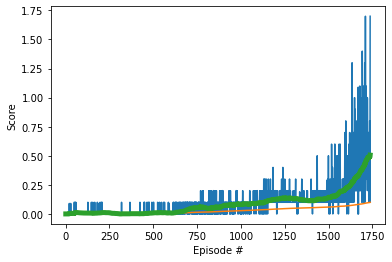

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(scores)+1), avg_scores)
plt.plot(np.arange(1, len(scores)+1), last100_avg, linewidth=5, markersize=12)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
for i in range(num_agents):
    torch.save(agents[i].actor_local.state_dict(), "actor_modelb" + str(i) + ".pth")
    torch.save(agents[i].critic_local.state_dict(), "critic_modelb" + str(i) + ".pth")



In [20]:
from ddpg_agent import Agent
import torch


def test_tennis():
    
    agent1 = Agent(state_size=state_size * 2, action_size=action_size,random_seed=1000)
    agent2 = Agent(state_size=state_size * 2, action_size=action_size,random_seed=1000)
    
    agent1.actor_local.load_state_dict(torch.load('actor_modelb0.pth'))
    agent1.critic_local.load_state_dict(torch.load('critic_modelb0.pth'))
    
    agent2.actor_local.load_state_dict(torch.load('actor_modelb1.pth'))
    agent2.critic_local.load_state_dict(torch.load('critic_modelb1.pth'))

    agents = [agent1,agent2]

    num_episodes = 5
    
    agent_scores = np.zeros(num_agents)
    
    for episode in range(1, num_episodes+1):
        
        env_info = env.reset(train_mode=False)[brain_name]
        
        state = env_info.vector_observations
        state = np.reshape(state,(1,48))
        
        for i in range(num_agents):
            agents[i].reset()
        
        
        while True:    
            action = []
            for i in range(num_agents):
                action.append(agents[i].act(state, add_noise=False))  
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            next_state = np.reshape(next_state, (1, -1))
            rewards = env_info.rewards
            dones = env_info.local_done

            agent_scores += rewards
            
            state = next_state
            
            if np.any(dones):
                break
        
        
        print("\n Episode {}  {} - {} ".format(episode, agent_scores[0], agent_scores[1]), end="")
               
    print("\n Max Score : {} ".format(np.max(agent_scores)))
                

    
test_tennis()     
          


 Episode 1  1.700000025331974 - 1.5900000240653753 
 Episode 2  4.300000064074993 - 4.190000062808394 
 Episode 3  4.2900000642985106 - 4.190000062808394 
 Episode 4  4.280000064522028 - 4.2900000642985106 
 Episode 5  6.3800000958144665 - 6.28000009432435 
 Max Score : 6.3800000958144665 


 Max Score : 4.100000061094761  3.8500000592321157 : 
